<a href="https://colab.research.google.com/github/vishwa83/D3_visualizations/blob/master/advance_regression_upgrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import necessary modules to complete model processing

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose  import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
upload = files.upload()

# Import raw data

import pandas as pd
data = pd.read_csv('train.csv')

Saving train.csv to train.csv


In [ ]:
# sns.pairplot(data)
# plt.show()

In [4]:
# Declare features and independant variables
X = data.drop(['SalePrice'],1)
y = data['SalePrice']

In [5]:
#Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1023)
num_cols = X_train.select_dtypes(exclude='object')

#Use pipeline function to create transformers for numeric and categorical variables

num_transform = Pipeline([('num_imputer', SimpleImputer(strategy='median', add_indicator=False)),
                         ('Scalar',MinMaxScaler())])

import numpy as np
cat_cols = X_train.select_dtypes(include='object')
cat_transform = Pipeline([('cat_imputer',SimpleImputer(strategy = 'constant', missing_values=np.nan,fill_value='missing', add_indicator = False)),
                          ('ohe',OneHotEncoder(handle_unknown='ignore'))])

# Chain numeric and categorical transformers using columntransformer

ct = ColumnTransformer([('num_transform',num_transform,num_cols.columns),
                        ('cat_transform',cat_transform,cat_cols.columns)], remainder='passthrough')


# Transforming train set using column transformer

xt = ct.fit_transform(X_train)
import scipy.sparse
mat = scipy.sparse.eye(3)
transformed_train_data = pd.DataFrame.sparse.from_spmatrix(xt)
transformed_train_data.shape

(1022, 301)

In [6]:
#transformed_train_data.head()
feature_name = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
         'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
         'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
         'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
         'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
         'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
         'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
         'MiscVal', 'MoSold', 'YrSold','MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl',
       'Alley_Pave', 'Alley_missing', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_AllPub', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Fin',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Flat', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'RoofMatl_ClyTile', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_AsbShng',
       'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd',
       'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc',
       'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood',
       'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkCmn',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'MasVnrType_missing', 'ExterQual_Ex', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Ex', 'ExterCond_Fa',
       'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtQual_missing', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po',
       'BsmtCond_TA', 'BsmtCond_missing', 'BsmtExposure_Av',
       'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No',
       'BsmtExposure_missing', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec',
       'BsmtFinType1_Unf', 'BsmtFinType1_missing', 'BsmtFinType2_ALQ',
       'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ',
       'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'BsmtFinType2_missing',
       'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW',
       'Heating_Wall', 'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd',
       'HeatingQC_TA', 'CentralAir_N', 'CentralAir_Y', 'Electrical_FuseA',
       'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix',
       'Electrical_SBrkr', 'Electrical_missing', 'KitchenQual_Ex',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1',
       'Functional_Min2', 'Functional_Mod', 'Functional_Sev',
       'Functional_Typ', 'FireplaceQu_Ex', 'FireplaceQu_Fa',
       'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA',
       'FireplaceQu_missing', 'GarageType_2Types', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_missing', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageFinish_missing',
       'GarageQual_Ex', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po',
       'GarageQual_TA', 'GarageQual_missing', 'GarageCond_Ex',
       'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA',
       'GarageCond_missing', 'PavedDrive_N', 'PavedDrive_P',
       'PavedDrive_Y', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_missing',
       'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw',
       'Fence_missing', 'MiscFeature_Gar2', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_TenC', 'MiscFeature_missing',
       'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial']

transformed_train_data.columns = feature_name

In [14]:
# Considering Linear Regression as the first model to begin with
# Using KFold Cross validation technique for better results

folds = KFold(n_splits=5,shuffle=True,random_state=1234)
params = {
    'rfe__n_features_to_select':[100,200,250,275]       
}
rfe = RFE(estimator=LinearRegression())
pipeline_final = Pipeline([('ct',ct),
                           ('rfe',rfe),
                           ('regressor', LinearRegression())])

gs = GridSearchCV(estimator=pipeline_final,
                  cv = folds,
                  return_train_score = True,
                  param_grid = params
                  )


In [7]:
# Considering Linear Regression as the first model to begin with
# Using KFold Cross validation technique for better results
# Using TruncatedSVD for dimsionality reduction

from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.metrics import make_scorer
folds = KFold(n_splits=5,shuffle=True,random_state=1234)
params = [{
    'reduce_dim':[TruncatedSVD(n_iter=7)],
    'reduce_dim__n_components':[50,60,70,100]    
},
{
    'reduce_dim':[SelectKBest(chi2)],
 'reduce_dim__k':[50,60,70,100] 
 
}]
rfe = RFE(estimator=LinearRegression())
pipeline_final = Pipeline([('ct',ct),
                           ('reduce_dim','passthrough'),
                           ('regressor', LinearRegression())])
# reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']
gs = GridSearchCV(estimator=pipeline_final,
                  cv = folds,
                  return_train_score = True,
                  param_grid = params
                  )


In [8]:
gs.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ct',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num_transform',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('num_imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                              

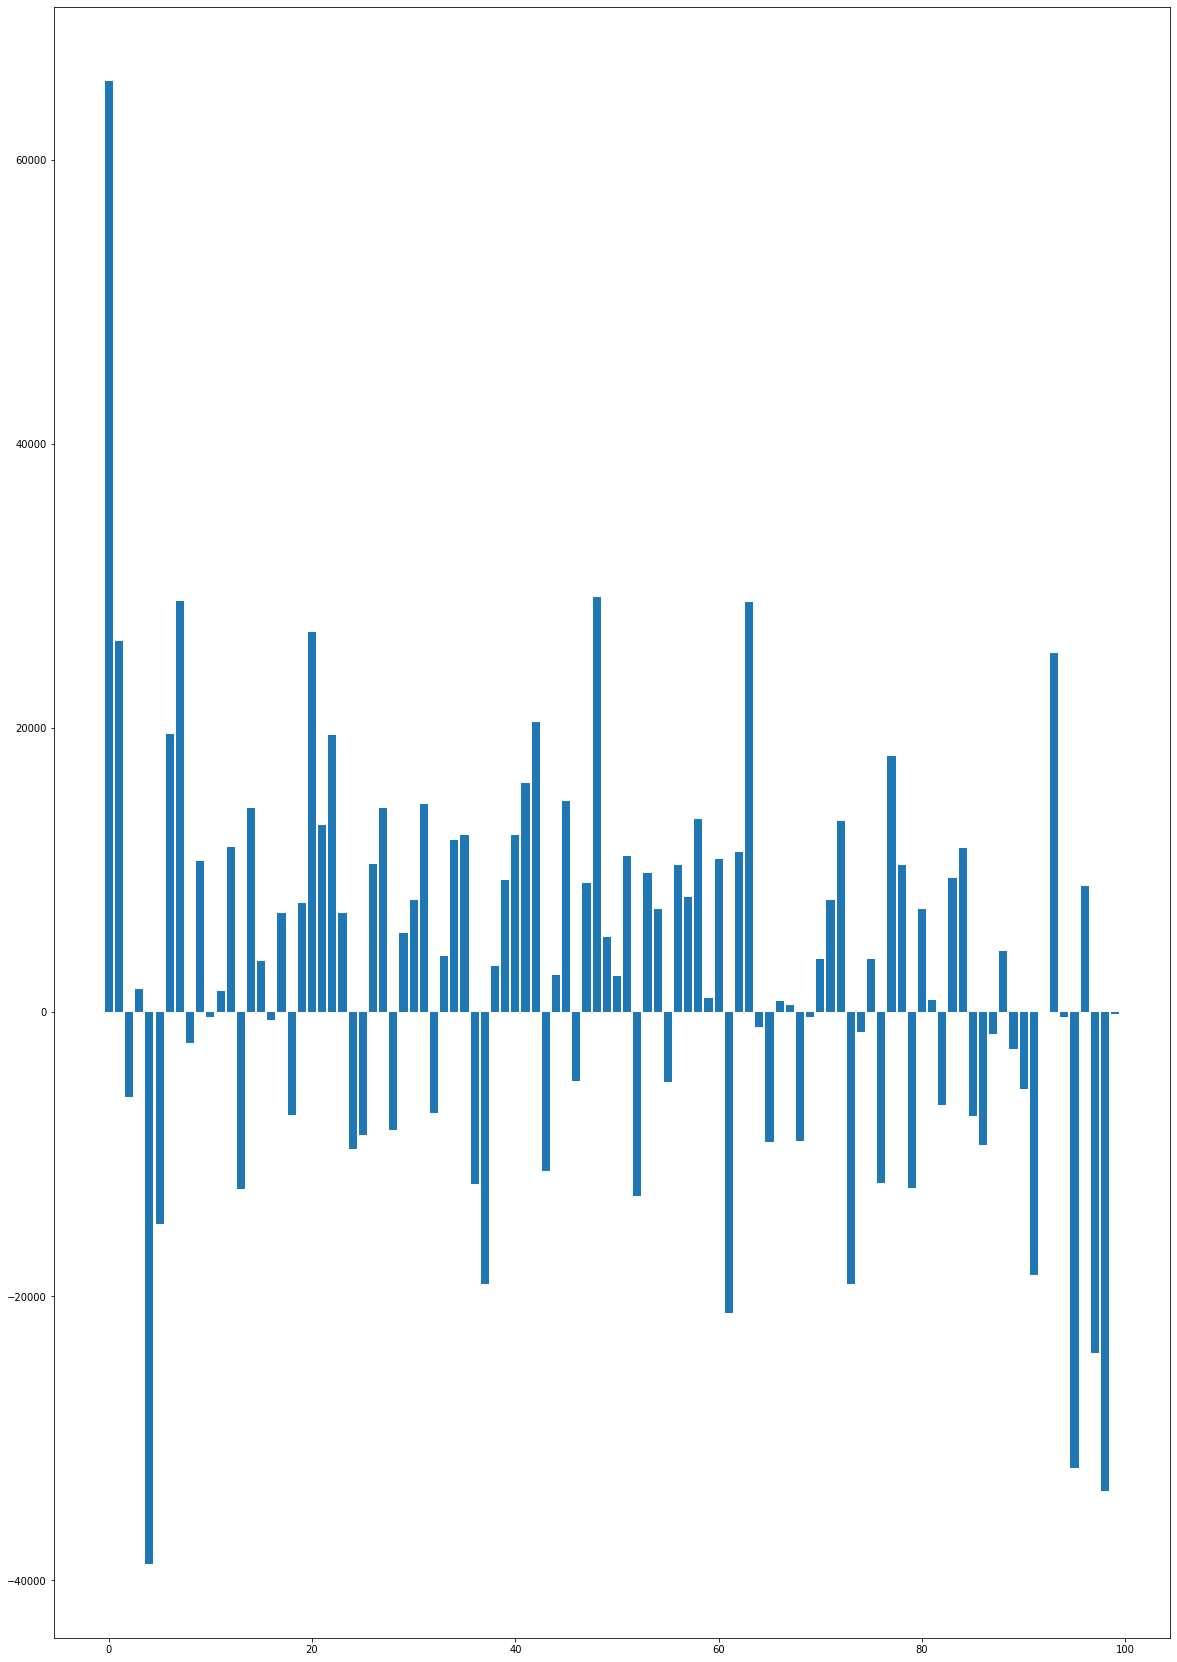

In [50]:
# Using co-efficients to identify feature importance of the model using Linear Regression as the estimator

import matplotlib.pyplot as plt
import seaborn
#summarize feature importance
featureImportanceLR = gs.best_estimator_[2].coef_
#for i,v in enumerate(featureImportanceLR):
#  print('Feature: %0d, Score: %5f' %(i,v))

#plot feature importance
plt.figure(figsize=(20,30))
plt.bar([i for i in range(len(featureImportanceLR))], featureImportanceLR)
plt.show()

In [9]:
print("r2 score for train set using linear Regression :{}".format(gs.score(X_train,y_train)) + "and r2 score for test set :{}".format(gs.score(X_test,y_test)))
print("Best parameters for the model using linear regression {}".format(gs.best_params_))

r2 score for train set using linear Regression :0.8697564539016023and r2 score for test set :0.8062887224312079
Best parameters for the model using linear regression {'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=100, n_iter=7,
             random_state=None, tol=0.0), 'reduce_dim__n_components': 100}


In [23]:
# Verifying Linear regression assumptions
#!pip install statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor

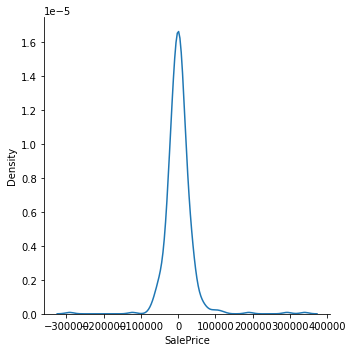

In [10]:
# Residuals analysis for model based on Linear Regression

pred = gs.predict(X_test)
import seaborn as sns
res = y_test - pred
sns.displot(res,kind='kde')

In [11]:
# Regularization

#Ridge
from sklearn.linear_model import Ridge, Lasso
folds = KFold(n_splits=5,shuffle=True,random_state=1234)
params = {
    'rfe__n_features_to_select':[100,200,250,275],
    'regressor__alpha':[5,10,15,20,25,35,40]       
}
rfe = RFE(estimator=LinearRegression())
pipeline_ridge = Pipeline([('ct',ct),
                           ('rfe',rfe),
                           ('regressor', Ridge())])

gs_ridge = GridSearchCV(estimator=pipeline_ridge,
                  cv = folds,
                  return_train_score = True,
                  param_grid = params
                  )


In [12]:
gs_ridge.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ct',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num_transform',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('num_imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                              

In [13]:
gs_ridge_predict = gs_ridge.predict(X_test)
gs_ridge.score(X_test,y_test)
print("r2 score for train set using Ridge Regression :{}".format(gs_ridge.score(X_train,y_train)) + "and r2 score for test set :{}".format(gs_ridge.score(X_test,y_test)))
print("Best parameters for the model using Ridge regression {}".format(gs_ridge.best_params_))

r2 score for train set using Ridge Regression :0.8985360799706467and r2 score for test set :0.8206272948724936
Best parameters for the model using Ridge regression {'regressor__alpha': 10, 'rfe__n_features_to_select': 275}


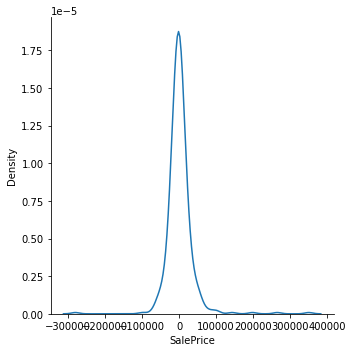

In [21]:
# Residual Analysis for Ridge Regression
ridge_pred = gs_ridge.predict(X_test)
import seaborn as sns
ridge_res = y_test - ridge_pred
sns.displot(ridge_res,kind='kde')


In [16]:
# Lasso

from sklearn.linear_model import Ridge, Lasso
folds = KFold(n_splits=5,shuffle=True,random_state=1234)
params = {
    'rfe__n_features_to_select':[100,200,250,275,300],
    'regressor__alpha':[5,10,15,20,25,35,40]       
}
rfe = RFE(estimator=LinearRegression())
pipeline_lasso = Pipeline([('ct',ct),
                           ('rfe',rfe),
                           ('regressor', Lasso())])

gs_lasso = GridSearchCV(estimator=pipeline_lasso,
                  cv = folds,
                  return_train_score = True,
                  param_grid = params
                  )


In [17]:
gs_lasso.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 542785991.1803589, tolerance: 481675924.17299867
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 586506078.2164917, tolerance: 483515736.419676
  max_iter, tol, rng, random, positive)


GridSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ct',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num_transform',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('num_imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                              

In [18]:
print("r2 score for train set using lasso Regression :{}".format(gs_lasso.score(X_train,y_train)) + "and r2 score for test set :{}".format(gs_lasso.score(X_test,y_test)))
print("Best parameters for the model using lasso regression {}".format(gs_lasso.best_params_))



r2 score for train set using lasso Regression :0.9316929680382012and r2 score for test set :0.8602413722281625
Best parameters for the model using lasso regression {'regressor__alpha': 40, 'rfe__n_features_to_select': 275}


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


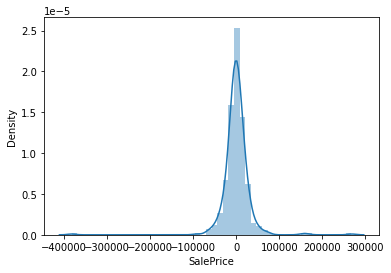

In [19]:
# Residual Analysis of the model having lasso Regression as the estimator
lasso_pred = gs_lasso.predict(X_test)
lasso_res = y_test - lasso_pred
sns.distplot(lasso_res,hist=True, kde=True)